In [19]:
import cv2
import os
import pickle
import numpy as np
import pickle

from PIL import Image
import matplotlib.pyplot as plt
import keras.utils as image
from keras_vggface import utils

# dimension of images
image_width = 224
image_height = 224

# load the training labels
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, "rb") as \
    f: class_dictionary = pickle.load(f)

class_list = [value for _, value in class_dictionary.items()]
print(class_list)


['dhoni', 'kohli', 'tata']


In [20]:
# for detecting faces
facecascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

for i in range(1,4): 
    test_image_filename = f'./test/img{i}.jpg'
    print(test_image_filename)

# load the image
imgtest = cv2.imread(test_image_filename, cv2.IMREAD_COLOR)

./test/img1.jpg
./test/img2.jpg
./test/img3.jpg


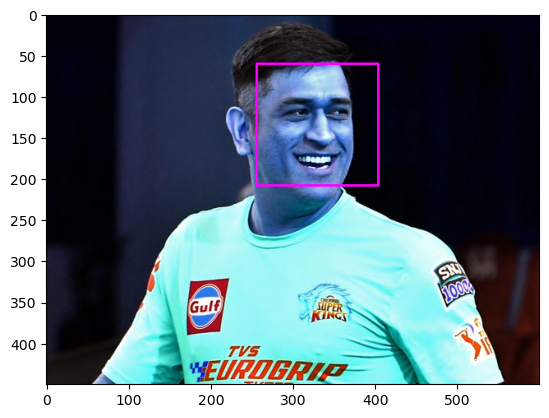

1/1 [==============================] - 0s 384ms/step
[[1. 0. 0.]]
0
Predicted face: dhoni



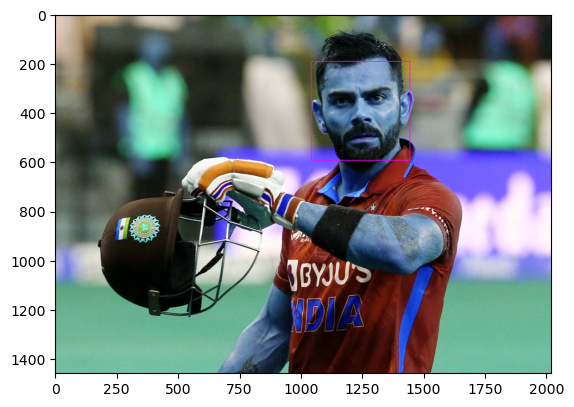

1/1 [==============================] - 0s 169ms/step
[[0. 1. 0.]]
1
Predicted face: kohli



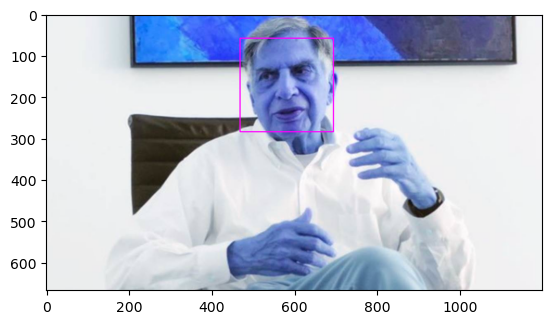

1/1 [==============================] - 0s 189ms/step
[[0. 0. 1.]]
2
Predicted face: tata



In [23]:
from tensorflow.keras.models import load_model
# returns a compiled model identical to the previous one
model = load_model(
    'transfer_learning_trained' +
    '_face_cnn_model.h5')
# for detecting faces
facecascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

for i in range(1,4): 
    test_image_filename = f'./test/img{i}.jpg'

    # load the image
    imgtest = cv2.imread(test_image_filename, cv2.IMREAD_COLOR)
    image_array = np.array(imgtest, "uint8")

    # get the faces detected in the image
    faces = facecascade.detectMultiScale(imgtest, 
        scaleFactor=1.1, minNeighbors=5)

    # if not exactly 1 face is detected, skip this photo
    if len(faces) != 1: 
        print(f'---We need exactly 1 face;photo skipped---')
        continue

    for (x_, y_, w, h) in faces:
        # draw the face detected
        face_detect = cv2.rectangle(
            imgtest, (x_, y_), (x_+w, y_+h), (255, 0, 255), 2)
        plt.imshow(face_detect)
        plt.show()

        # resize the detected face to 224x224
        size = (image_width, image_height)
        roi = image_array[y_: y_ + h, x_: x_ + w]
        resized_image = cv2.resize(roi, size)

        # prepare the image for prediction
        x = image.img_to_array(resized_image)
        x = np.expand_dims(x, axis=0)
        x = utils.preprocess_input(x, version=1)

        # making prediction
        predicted_prob = model.predict(x)
        print(predicted_prob)
        print(predicted_prob[0].argmax())
        print("Predicted face: " + class_list[predicted_prob[0].argmax()])
        print("============================\n")
